In [11]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

nltk.download(['punkt','stopwords','wordnet','omw-1.4','averaged_perceptron_tagger'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\opedneka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\opedneka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\opedneka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\opedneka\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\opedneka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Loading data

In [3]:
with open('input.txt') as f:
    lines = [line.strip() for line in f.readlines() if line!='\n']
lines

["Smartphones have become an integral part of our lives, changing the way we communicate, access information, and entertain ourselves. These devices have come a long way since their inception, with the first smartphone introduced in 1992. However, it wasn't until the release of the iPhone in 2007 that smartphones became widely popular and sparked a technological revolution.",
 'One of the most significant features of smartphones is their ability to connect people from all over the world. With instant messaging, video calls, and social media, smartphones have made it easier than ever before to stay in touch with friends and family. These devices have also made it possible to work remotely and stay connected to colleagues no matter where they are.',
 'Smartphones have also transformed the way we access information. With the internet at our fingertips, we can easily search for answers to any question we have. This has made learning and research more accessible than ever before. Additional

### Data Preprocessing

Tokenization: We will break down sentences into single words (tokens) since we would be using words for tasks in the future. To do so, we used the word tokenizer available in nltk

In [4]:
data = [word_tokenize(sent) for sent in lines]
print(data[0])

['Smartphones', 'have', 'become', 'an', 'integral', 'part', 'of', 'our', 'lives', ',', 'changing', 'the', 'way', 'we', 'communicate', ',', 'access', 'information', ',', 'and', 'entertain', 'ourselves', '.', 'These', 'devices', 'have', 'come', 'a', 'long', 'way', 'since', 'their', 'inception', ',', 'with', 'the', 'first', 'smartphone', 'introduced', 'in', '1992', '.', 'However', ',', 'it', 'was', "n't", 'until', 'the', 'release', 'of', 'the', 'iPhone', 'in', '2007', 'that', 'smartphones', 'became', 'widely', 'popular', 'and', 'sparked', 'a', 'technological', 'revolution', '.']


Make lowercase and remove punctuation: 
1. We remove irrelevant characters like punctuations. To do so, we check if the word is alphanumeric or not thus using only words and omitting punctuations.
2. To remove redundancy we make the words lowercase so words like "DeviCEs" and "devices" are considered to be same and redundancy is removed. 

In [5]:
data_processed=[[word.lower() for word in sent if word.isalpha()] for sent in data]
print(data_processed[0])

['smartphones', 'have', 'become', 'an', 'integral', 'part', 'of', 'our', 'lives', 'changing', 'the', 'way', 'we', 'communicate', 'access', 'information', 'and', 'entertain', 'ourselves', 'these', 'devices', 'have', 'come', 'a', 'long', 'way', 'since', 'their', 'inception', 'with', 'the', 'first', 'smartphone', 'introduced', 'in', 'however', 'it', 'was', 'until', 'the', 'release', 'of', 'the', 'iphone', 'in', 'that', 'smartphones', 'became', 'widely', 'popular', 'and', 'sparked', 'a', 'technological', 'revolution']


We flatten the list to get a single list of words from nested list of sentences and then use the built-in Counter module in Python to find most common 10 words

In [6]:
flattened = [val for sent in data_processed for val in sent]
count = Counter(flattened)
count.most_common(10)

[('and', 20),
 ('to', 15),
 ('the', 14),
 ('smartphones', 13),
 ('have', 12),
 ('with', 12),
 ('as', 11),
 ('also', 8),
 ('such', 7),
 ('of', 6)]

As we can see above, the most common words are those which provide very little value to the data. So lets remove these stopwords and find the most common words relevant to the data

In [7]:
stop_words = stopwords.words('english')
data_processed=[[word for word in sent if word not in stop_words] for sent in data_processed]
print(data_processed[0])

['smartphones', 'become', 'integral', 'part', 'lives', 'changing', 'way', 'communicate', 'access', 'information', 'entertain', 'devices', 'come', 'long', 'way', 'since', 'inception', 'first', 'smartphone', 'introduced', 'however', 'release', 'iphone', 'smartphones', 'became', 'widely', 'popular', 'sparked', 'technological', 'revolution']


Using WordNet for performing lematization

In [14]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(words, pos_tags):
    return [lemmatizer.lemmatize(word, pos=wordnet_pos(tag)) for word, tag in zip(words, pos_tags)]

def wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

sentPos = [nltk.pos_tag(sent) for sent in data_processed]
dataLemma = [[lemmatizer.lemmatize(word, pos=wordnet_pos(tag)) for word, tag in pos_tags] for pos_tags in sentPos]
dataLemma[0]

['smartphones',
 'become',
 'integral',
 'part',
 'live',
 'change',
 'way',
 'communicate',
 'access',
 'information',
 'entertain',
 'device',
 'come',
 'long',
 'way',
 'since',
 'inception',
 'first',
 'smartphone',
 'introduce',
 'however',
 'release',
 'iphone',
 'smartphones',
 'become',
 'widely',
 'popular',
 'spark',
 'technological',
 'revolution']

In [23]:
flattened = [val for sent in dataLemma for val in sent]
count = Counter(flattened)
top10 = count.most_common(10)
top10

[('smartphones', 13),
 ('also', 8),
 ('make', 6),
 ('become', 5),
 ('device', 5),
 ('way', 4),
 ('access', 4),
 ('world', 4),
 ('apps', 4),
 ('live', 3)]

We can see now that the words we got are more relevant to the text data. Now lets plot the bar chart and box plot using seaborn library

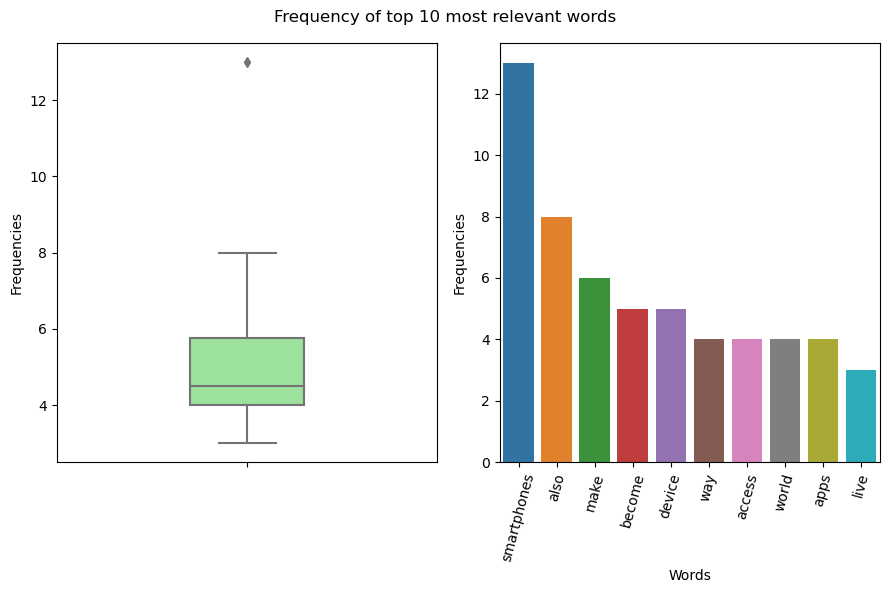

In [24]:
freqs = [word[1] for word in top10]
words = [word[0] for word in top10]

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(9,6))
sns.boxplot(y=freqs, color='lightgreen',width = 0.3, ax=ax1)
ax1.set_ylabel('Frequencies')

sns.barplot(x=words,y=freqs,ax=ax2)
ax2.set_xticklabels(words,rotation=75)
ax2.set_xlabel('Words')
ax2.set_ylabel('Frequencies')

plt.suptitle('Frequency of top 10 most relevant words')
plt.tight_layout()
plt.show()

### Write a Python program to generate WordCloud



Wordcloud gives us a brief idea about the occurance of various words in the text. The words occuring large number of times are shown bigger in the wordcloud and those occuring less number of times are shown smaller. It can give us an idea about the frequency of words across document. To implement this we use the WordCloud library present in Python. We pass it a single string consisting of words joined by whitespace from our preprocessed data

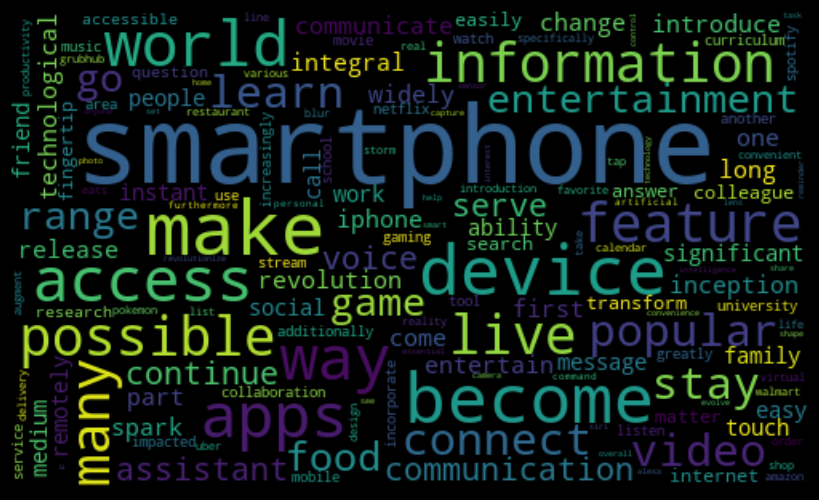

In [27]:
text = ' '.join(word for sent in dataLemma for word in sent)
wordcloud = WordCloud(
    width = 500,
    height = 300,
    background_color = 'black',
    stopwords = STOPWORDS).generate(text)
fig = plt.figure(
    figsize = (8, 6),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()